## 1. https://pydicom.github.io/pydicom/dev/old/image_data_handlers.html
## 2. https://github.com/pydicom/pydicom/issues/1003


---

also for GDCM, but it is harder, since requires writting C code http://gdcm.sourceforge.net/2.0/gdcm-2.0.19.pdf, look for `gdcmconv` script, implemented here https://github.com/malaterre/GDCM/blob/master/Applications/Cxx/gdcmconv.cxx

# GDCM installation

conda install -c conda-forge gdcm

sudo apt install libgdcm-tools


# TODO

## try

1. https://github.com/lilohuang/PyTurboJPEG 
2. https://glymur.readthedocs.io/en/latest/how_do_i.html#write-images

# 1. using gdcmconv for reference

### RLE

In [2]:
!gdcmconv

gdcmconv: gdcm 3.0.5 $Date$
Usage: gdcmconv [OPTION] input.dcm output.dcm
Convert a DICOM file into another DICOM file.
Parameter (required):
  -i --input      DICOM filename
  -o --output     DICOM filename
Options:
  -X --explicit            Change Transfer Syntax to explicit.
  -M --implicit            Change Transfer Syntax to implicit.
  -U --use-dict            Use dict for VR (only public by default).
     --with-private-dict   Use private dict for VR (advanced user only).
  -C --check-meta          Check File Meta Information (advanced user only).
     --root-uid            Root UID.
     --remove-gl           Remove group length (deprecated in DICOM 2008).
     --remove-private-tags Remove private tags.
     --remove-retired      Remove retired tags.
Image only Options:
  -l --apply-lut                      Apply LUT (non-standard, advanced user only).
  -8 --apply-lut8                     Apply LUT/RGB8 (non-standard, advanced user only).
     --decompress-lut                

In [1]:
!gdcmconv -i ../data/jpeg_dicom_examples/0/0.dcm -o ../data/jpeg_dicom_examples/0/0_rle.dcm -R

### JPEG

In [2]:
!gdcmconv -i ../data/jpeg_dicom_examples/0/0.dcm -o ../data/jpeg_dicom_examples/0/0_jpeg.dcm -J

### JPEG2000

In [3]:
!gdcmconv -i ../data/jpeg_dicom_examples/0/0.dcm -o ../data/jpeg_dicom_examples/0/0_jpeg2k.dcm -K

### JPEG lossless

In [4]:
#smth goes wrong with lossless
!gdcmconv -i ../data/jpeg_dicom_examples/0/0.dcm -o ../data/jpeg_dicom_examples/0/0_jpegls.dcm -L

In [5]:
!ls -lha ../data/jpeg_dicom_examples/1/

total 2,8M
drwxr-xr-x 2 anvar anvar 4,0K ноя 10 16:34 .
drwxr-xr-x 5 anvar anvar 4,0K ноя 11 21:06 ..
-rw-r--r-- 1 anvar anvar 784K окт 30 16:45 1.dcm
-rw-r--r-- 1 anvar anvar 551K ноя 10 16:34 1_jpeg2k.dcm
-rw-r--r-- 1 anvar anvar 619K ноя 10 16:34 1_jpeg.dcm
-rw-r--r-- 1 anvar anvar 190K ноя 10 16:46 1_jpegls.dcm
-rw-r--r-- 1 anvar anvar 628K ноя 10 16:34 1_rle.dcm


In [6]:
# weird result, since lossles is smaller than jpeg and jpeg2000

# Read compressed files using `pydicom`

In [140]:
from pydicom import dcmread
from pathlib import Path
import numpy as np
import pylibjpeg
import matplotlib.pyplot as plt
%matplotlib inline

folder = Path('/home/anvar/work/data/jpeg_dicom_examples/1')

In [141]:
ds = dcmread(folder / '1.dcm')
ds_jpeg = dcmread(folder / '1_jpeg.dcm')
ds_jpeg2k = dcmread(folder / '1_jpeg2k.dcm')
ds_jpegls = dcmread(folder / '1_jpegls.dcm')
# ds_jpegls.decompress()
ds_rle = dcmread(folder / '1_rle.dcm')

In [144]:
ds_jpeg.BitsAllocated, ds_jpeg.BitsStored, ds_jpeg.SamplesPerPixel, ds_jpeg.PlanarConfiguration

(8, 8, 3, 0)

In [59]:
ds_jpeg.file_meta

(0002, 0000) File Meta Information Group Length  UL: 240
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1602501072.104.1.19
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.4
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.4'
(0002, 0016) Source Application Entity Title     AE: 'gdcmconv'

In [14]:
ds_jpegls.pixel_array.shape

(512, 512, 3)

In [15]:
ds_jpeg2k.pixel_array.shape

(512, 512, 3)

In [16]:
ds.pixel_array.shape

(512, 512, 3)

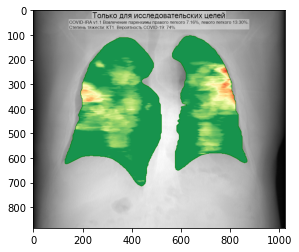

In [3]:
plt.imshow(ds.pixel_array)

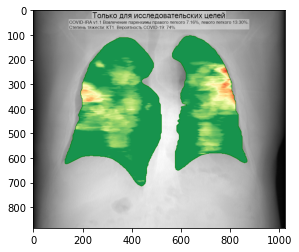

In [4]:
plt.imshow(ds_jpeg.pixel_array)

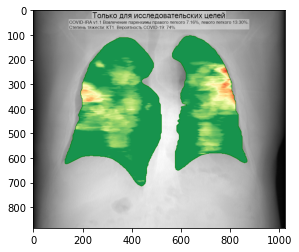

In [5]:
plt.imshow(ds_jpeg2k.pixel_array)

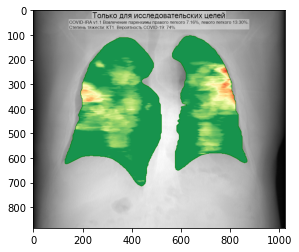

In [6]:
plt.imshow(ds_rle.pixel_array)

In [86]:
len(ds_jpeg2k.PixelData)

738010

In [85]:
len(ds_jpegls.PixelData)

251884

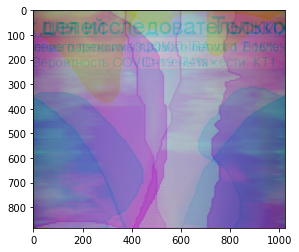

In [7]:
plt.imshow(ds_jpegls.pixel_array)

In [8]:
from pylibjpeg import decode

In [11]:
from io import BytesIO

## Compare original and JPEG

In [36]:
np.allclose(ds.pixel_array, ds_jpeg.pixel_array)

True

In [37]:
np.allclose(ds.pixel_array, ds_rle.pixel_array)

True

In [38]:
np.allclose(ds.pixel_array, ds_jpeg2k.pixel_array)

True

In [54]:
ds.file_meta

(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1602501072.104.1.19
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.0.0'

In [8]:
ds_jpegls.file_meta

(0002, 0000) File Meta Information Group Length  UL: 240
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1602501072.104.1.19
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.4
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.4'
(0002, 0016) Source Application Entity Title     AE: 'gdcmconv'

In [13]:
len(ds_jpegls.dir())

106

In [10]:
ds_rle.file_meta

(0002, 0000) File Meta Information Group Length  UL: 238
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1602501072.104.1.19
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.4
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.4'
(0002, 0016) Source Application Entity Title     AE: 'gdcmconv'

In [22]:
for tag in ds_rle.dir():
    if tag not in ['PixelData','ProcedureCodeSequence']:
        print(tag)
        print(ds_rle[tag])
        print(ds_jpegls[tag])
        print('==============')

AccessionNumber
(0008, 0050) Accession Number                    SH: 'ERIS000001001746'
(0008, 0050) Accession Number                    SH: 'ERIS000001001746'
AcquisitionDate
(0008, 0022) Acquisition Date                    DA: '20200408'
(0008, 0022) Acquisition Date                    DA: '20200408'
AcquisitionNumber
(0020, 0012) Acquisition Number                  IS: "3"
(0020, 0012) Acquisition Number                  IS: "3"
AcquisitionTime
(0008, 0032) Acquisition Time                    TM: '132159.350'
(0008, 0032) Acquisition Time                    TM: '132159.350'
BitsAllocated
(0028, 0100) Bits Allocated                      US: 8
(0028, 0100) Bits Allocated                      US: 8
BitsStored
(0028, 0101) Bits Stored                         US: 8
(0028, 0101) Bits Stored                         US: 8
CTDIvol
(0018, 9345) CTDIvol                             FD: 21.2
(0018, 9345) CTDIvol                             FD: 21.2
Columns
(0028, 0011) Columns                   

In [51]:
ds_jpeg2k.file_meta

(0002, 0000) File Meta Information Group Length  UL: 240
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1602501072.104.1.19
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.4
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.4'
(0002, 0016) Source Application Entity Title     AE: 'gdcmconv'

In [50]:
ds_jpeg.file_meta

(0002, 0000) File Meta Information Group Length  UL: 240
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1602501072.104.1.19
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.4
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.4'
(0002, 0016) Source Application Entity Title     AE: 'gdcmconv'

# Open jpeg grayscale

In [56]:
ds_gray = dcmread(folder.parent / '2/2.dcm')

In [57]:
ds_gray.file_meta

(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9116.2.5.1.37.2418211076.1600420163.347673
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.9.3811.1.5.2
(0002, 0013) Implementation Version Name         SH: 'PYNETDICOM_152'

In [58]:
ds_gray.decompress()

In [59]:
ds_gray.file_meta

(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9116.2.5.1.37.2418211076.1600420163.347673
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.9.3811.1.5.2
(0002, 0013) Implementation Version Name         SH: 'PYNETDICOM_152'

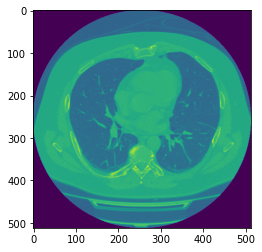

In [29]:
plt.imshow(ds_gray.pixel_array)

In [54]:
from pydicom import dcmwrite

In [60]:
dcmwrite(folder.parent / '2/2.dcm',ds_gray)

In [61]:
!gdcmconv -i ../data/jpeg_dicom_examples/2/2.dcm -o ../data/jpeg_dicom_examples/2/2_rle.dcm -R

In [62]:
!gdcmconv -i ../data/jpeg_dicom_examples/2/2.dcm -o ../data/jpeg_dicom_examples/2/2_jpeg.dcm -J

In [63]:
!gdcmconv -i ../data/jpeg_dicom_examples/2/2.dcm -o ../data/jpeg_dicom_examples/2/2_jpeg2k.dcm -K

In [64]:
#smth goes wrong with lossless
!gdcmconv -i ../data/jpeg_dicom_examples/2/2.dcm -o ../data/jpeg_dicom_examples/2/2_jpegls.dcm -L

In [66]:
ds_jpeg_ls2 = dcmread(folder.parent / '2' / '2_jpegls.dcm')

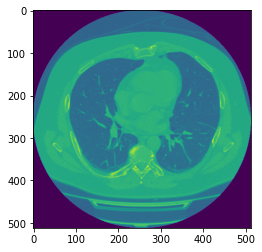

In [68]:
plt.imshow(ds_jpeg_ls2.pixel_array)

In [70]:
np.allclose(ds_jpeg_ls2.pixel_array, ds_gray.pixel_array)

True

In [69]:
ds_jpeg_ls2.file_meta

(0002, 0000) File Meta Information Group Length  UL: 234
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9116.2.5.1.37.2418211076.1600420163.347673
(0002, 0010) Transfer Syntax UID                 UI: JPEG-LS Lossless Image Compression
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.4
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.4'
(0002, 0016) Source Application Entity Title     AE: 'gdcmconv'

# Using PIL

Seems like the reason is Photometric Interpretation

In [1]:
from PIL import Image
from io import BytesIO
from pydicom.encaps import encapsulate
from pydicom import dcmread, dcmwrite
from pathlib import Path
import numpy as np
import pylibjpeg
import matplotlib.pyplot as plt
import PIL
from pydicom.uid import JPEGBaseline, JPEGExtended
%matplotlib inline

folder = Path('/home/anvar/work/data/jpeg_dicom_examples/0')

### Lossy using `gdcmconv`

In [2]:
!gdcmconv -J --lossy -q 1 -i ../data/jpeg_dicom_examples/0/0.dcm -o ../data/jpeg_dicom_examples/0/0_jpeg.dcm 

You have selected a lossy compression transfer syntax.
This will degrade the quality of your input image, and can.
impact professional interpretation of the image.
Do not use if you do not understand the risk.


In [3]:
ds_jpeg = dcmread(folder / '0_jpeg.dcm')

# pixel_data = ds_jpeg.PixelData

In [4]:
ds_jpeg.file_meta

(0002, 0000) File Meta Information Group Length  UL: 240
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1143.5149922852881403979051826647346629705
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.2.8.4
(0002, 0013) Implementation Version Name         SH: 'GDCM 2.8.4'
(0002, 0016) Source Application Entity Title     AE: 'gdcmconv'

In [5]:
ds_jpeg.BitsAllocated, ds_jpeg.BitsStored, ds_jpeg.SamplesPerPixel, ds_jpeg.PlanarConfiguration, ds_jpeg.PhotometricInterpretation

(8, 8, 3, 0, 'RGB')

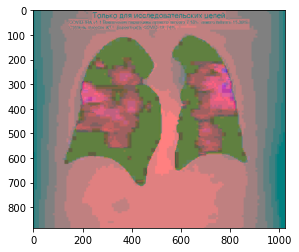

In [7]:
plt.imshow(ds_jpeg.pixel_array)

### При этом в веазисе открывается с нормальной палитрой

In [8]:
dc = dcmread(folder / '0.dcm')
print(len(dc.PixelData))
del dc['IconImageSequence']
px = dc.pixel_array

2715648


In [9]:
# im = Image.fromarray(px).convert('RGB')
# out = BytesIO()
# im.save(out, format='jpeg', quality=1)
# out.seek(0)
# image = Image.open(out)
# image

In [18]:
im = Image.fromarray(px) #.convert('RGB')#.convert('gray')#
out = BytesIO()
im.save(out, format='jpeg', quality=1)
out.seek(0)

temp = encapsulate([out.getvalue()])
dc.PixelData = temp
# ds['PixelData'].is_undefined_length = True
dc.file_meta.TransferSyntaxUID = JPEGBaseline

print(len(out.getvalue()))

17947


In [20]:
2715648 / 17947

151.3148715662785

In [11]:
# ds.PhotometricInterpretation = 'YBR_FULL_422'# 'YBR_FULL' # 'YBR_FULL_422' # 'RGB'

In [17]:
for key in ds_jpeg.dir():
    try:
        ds_jpeg[key]
        dc[key]
    except Exception as e:
        try:
            print(e)
            print(ds_jpeg[key])
            print('============')
        except Exception as e:
            print(e)
            print('$$$$$$$$$$$$$')

(0008, 9215)
(0008, 9215) Derivation Code Sequence            SQ: <Sequence, length 1>
(0008, 2111)
(0008, 2111) Derivation Description              ST: 'lossy conversion'
(0088, 0200)
(0088, 0200) Icon Image Sequence                 SQ: <Sequence, length 1>
(0028, 2110)
(0028, 2110) Lossy Image Compression             CS: '01'
(0028, 2112)
(0028, 2112) Lossy Image Compression Ratio       DS: "151.458337981037"
Unknown Value Representation '0x0a 0x00' in tag (0008, 0005) in tag (0008, 1032)
Unknown Value Representation '0x0a 0x00' in tag (0008, 0005) in tag (0008, 1032)
$$$$$$$$$$$$$
(0008, 2112)
(0008, 2112) Source Image Sequence               SQ: <Sequence, length 1>


In [22]:
ds_jpeg['DerivationCodeSequence'][0]

(0008, 0100) Code Value                          SH: '113040'
(0008, 0102) Coding Scheme Designator            SH: 'DCM'
(0008, 0104) Code Meaning                        LO: 'Lossy Compression'

In [25]:
ds_jpeg['SourceImageSequence'][0]

(0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
(0008, 1155) Referenced SOP Instance UID         UI: 1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1602501057.550.1.83
(0040, a170)  Purpose of Reference Code Sequence   1 item(s) ---- 
   (0008, 0100) Code Value                          SH: '121320'
   (0008, 0102) Coding Scheme Designator            SH: 'DCM'
   (0008, 0104) Code Meaning                        LO: 'Uncompressed predecessor'
   ---------

In [220]:
ds.BitsAllocated, ds.BitsStored, ds.SamplesPerPixel, ds.PlanarConfiguration

(8, 8, 3, 0)

In [221]:
ds.PixelData = pixel_data

ds['PixelData'].is_undefined_length = True

In [223]:
dcmwrite(folder / '0_jpeg_1%_pil.dcm', ds, write_like_original=False)

In [134]:
im = dcmread(folder / '0_jpeg_20%_pil.dcm')

/home/anvar/miniconda3/lib/python3.7/site-packages/pydicom/filereader.py:304: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


In [135]:
im.decompress()

In [136]:
im.PhotometricInterpretation

'YBR_FULL_422'

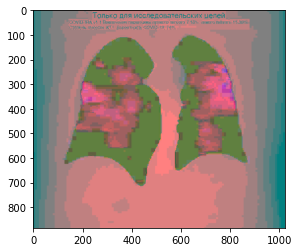

In [137]:
plt.imshow(im.pixel_array)

In [138]:
px = im.pixel_array
R, G, B = px[..., 0], px[..., 1], px[..., 2]

In [113]:
Y = + .2990*R + .5870*G + .1140*B

CB= - .1687*R - .3313*G + .5000*B + 128

CR= + .5000*R - .4187*G - .0813*B + 128

In [120]:
im_ybr = np.zeros((884, 1024, 3))
im_ybr[...,0], im_ybr[...,1], im_ybr[...,2] = Y, CB, CR

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


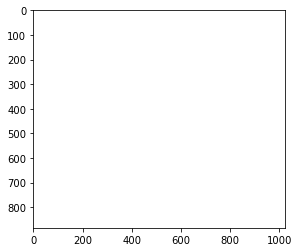

In [121]:
plt.imshow(im_ybr)

In [124]:
CR

array([[80. , 80. , 80. , ..., 80. , 80. , 80. ],
       [80. , 80. , 80. , ..., 80. , 80. , 80. ],
       [80. , 80. , 80. , ..., 80. , 80. , 80. ],
       ...,
       [80. , 80. , 80. , ..., 64.5, 64.5, 64.5],
       [80. , 80. , 80. , ..., 64.5, 64.5, 64.5],
       [80. , 80. , 80. , ..., 64.5, 64.5, 64.5]])